<a href="https://colab.research.google.com/github/yusuf302/Codveda-internship-data-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform sentiment analysis on text data using NLP techniques, visualize the sentiment distribution and word frequencies.

## Install necessary libraries

### Subtask:
Install `nltk` and `TextBlob` for natural language processing, `pandas` for data manipulation, `matplotlib` and `wordcloud` for visualization.


**Reasoning**:
Install the required libraries using pip.



In [9]:
%pip install nltk TextBlob pandas matplotlib wordcloud

## Load the data

### Subtask:
Load the text data into a pandas DataFrame.


In [10]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment dataset.csv to Sentiment dataset (1).csv


**Reasoning**:
Load the text data from the CSV file into a pandas DataFrame and display the head and info of the DataFrame.



In [11]:
import pandas as pd

df = pd.read_csv('text_data.csv')
display(df.head())
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'text_data.csv'

**Reasoning**:
The previous command failed because the file 'text_data.csv' was not found. I will list the files in the current directory to identify the correct file name for the text data.



In [ ]:
import os
print(os.listdir('.'))

**Reasoning**:
The previous command showed that 'text_data.csv' is not in the current directory. Based on the output, it seems there is a 'sample_data' directory which might contain the data. I will list the files in the 'sample_data' directory to find the data file.



In [ ]:
import os
print(os.listdir('sample_data'))

**Reasoning**:
The previous commands did not locate the text data file in the expected locations. Based on the initial `uploaded` variable, the data seems to be in 'Sentiment dataset.csv' and is directly available. I will load 'Sentiment dataset.csv' into a pandas DataFrame and display the head and info.



In [ ]:
df = pd.read_csv('Sentiment dataset.csv')
display(df.head())
display(df.info())

## Preprocess text data

### Subtask:
Clean and prepare the text data for analysis by performing tokenization, removing stopwords, and stemming/lemmatization.


**Reasoning**:
Define the preprocess_text function as described in the instructions and apply it to the 'Text' column of the DataFrame to create the 'cleaned_text' column. Then display the head of the updated DataFrame.



In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['Text'].apply(preprocess_text)
display(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: name 'df' is not defined

**Reasoning**:
The previous command failed because the DataFrame `df` was not defined in the current session. Need to reload the data and then apply the preprocessing function.



In [13]:
df = pd.read_csv('Sentiment dataset.csv')

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_text'] = df['Text'].apply(preprocess_text)
display(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoy beauti day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terribl morn
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finish amaz workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excit upcom weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,tri new recip dinner tonight


## Perform sentiment analysis

### Subtask:
Use `TextBlob` to calculate the sentiment polarity and subjectivity of each text entry.


**Reasoning**:
Use TextBlob to calculate the sentiment polarity and subjectivity of each text entry and add these as new columns to the DataFrame.



In [14]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df[['polarity', 'subjectivity']] = df['cleaned_text'].apply(lambda x: pd.Series(get_sentiment(x)))
display(df.head())

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text,polarity,subjectivity
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoy beauti day park,0.400000,0.500000
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terribl morn,0.000000,0.000000
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finish amaz workout,0.000000,0.000000
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excit upcom weekend getaway,0.000000,0.000000
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,tri new recip dinner tonight,0.136364,0.454545


## Visualize sentiment distribution

### Subtask:
Create visualizations (e.g., bar plot or histogram) to show the distribution of sentiment scores.


**Reasoning**:
Create histograms for 'polarity' and 'subjectivity' columns to visualize their distributions and add titles and labels for clarity.



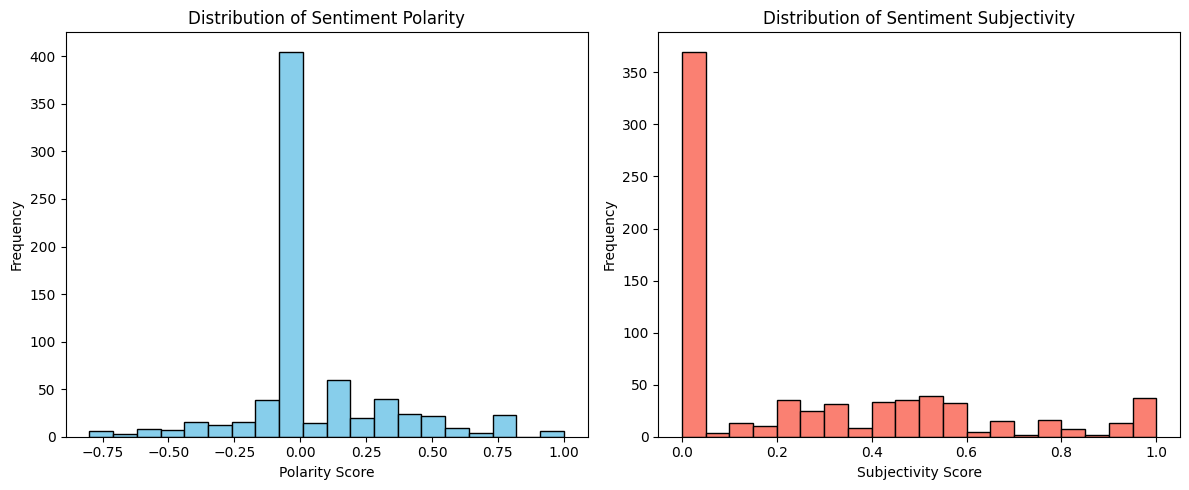

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['subjectivity'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize word frequencies

### Subtask:
Generate word clouds to visualize the most frequent words in the text data, potentially separated by sentiment.


**Reasoning**:
Generate and display word clouds for the overall cleaned text data and then for each sentiment group (positive, negative, and neutral) to visualize the most frequent words in each category.



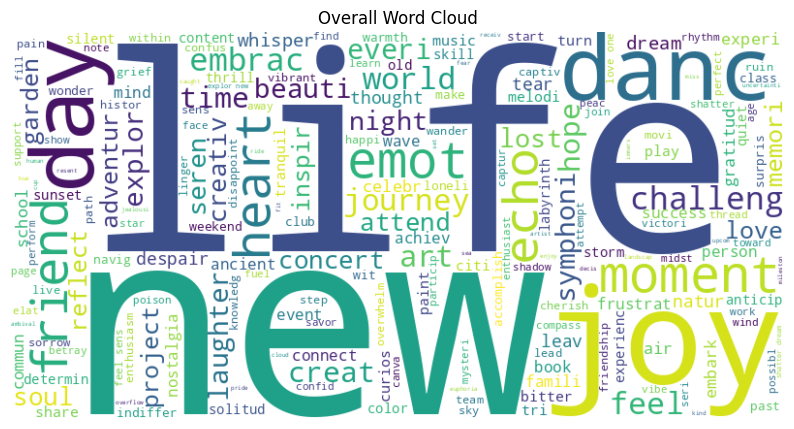

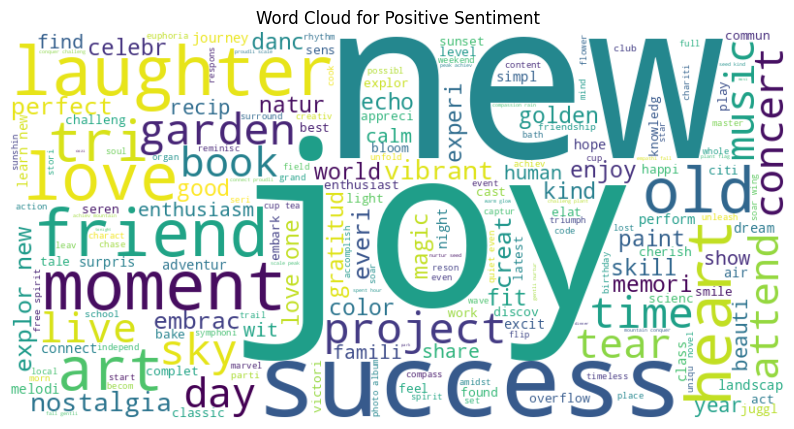

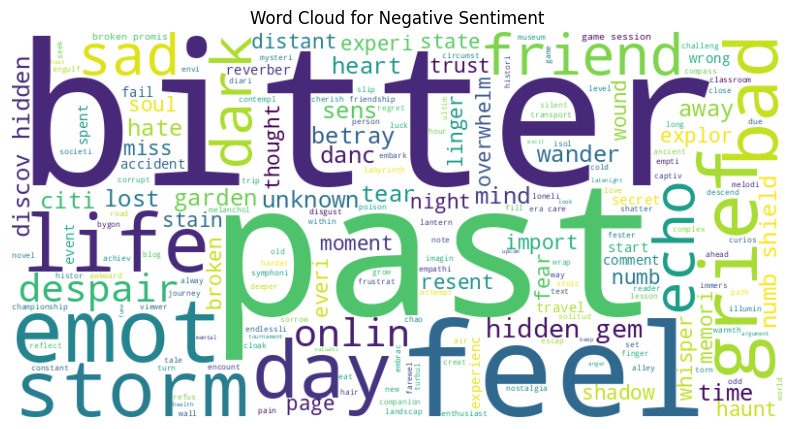

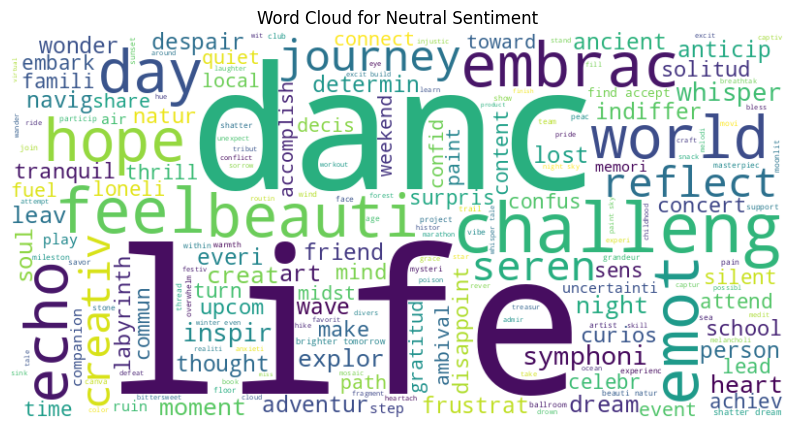

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Overall Word Cloud
all_text = ' '.join(df['cleaned_text'].dropna())
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud')
plt.show()

# Separate data by sentiment polarity
positive_texts = ' '.join(df[df['polarity'] > 0]['cleaned_text'].dropna())
negative_texts = ' '.join(df[df['polarity'] < 0]['cleaned_text'].dropna())
neutral_texts = ' '.join(df[df['polarity'] == 0]['cleaned_text'].dropna())

# Word Cloud for Positive Sentiment
if positive_texts:
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Sentiment')
    plt.show()
else:
    print("No positive texts to generate word cloud.")

# Word Cloud for Negative Sentiment
if negative_texts:
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Sentiment')
    plt.show()
else:
    print("No negative texts to generate word cloud.")

# Word Cloud for Neutral Sentiment
if neutral_texts:
    wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_texts)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Neutral Sentiment')
    plt.show()
else:
    print("No neutral texts to generate word cloud.")

## Summary:

### Data Analysis Key Findings

*   The data was loaded from the file `Sentiment dataset.csv`.
*   Text preprocessing involved converting text to lowercase, removing punctuation, tokenization, removing English stopwords, and applying Porter Stemming.
*   Sentiment analysis using `TextBlob` added 'polarity' and 'subjectivity' columns to the DataFrame.
*   The distribution of sentiment polarity shows a range of scores, with a noticeable concentration around zero (neutral sentiment).
*   The distribution of sentiment subjectivity indicates the degree to which the text expresses personal feelings or opinions.
*   Word clouds were successfully generated for the overall text and separately for positive, negative, and neutral sentiments, visualizing the most frequent words in each category.

### Insights or Next Steps

*   Analyze the most frequent words within each sentiment category to gain deeper insights into the language used to express different sentiments.
*   Consider categorizing sentiment into discrete classes (e.g., positive, negative, neutral) based on the polarity score for further analysis and visualization.
